In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import scipy.stats as sp

In [2]:
#Przygotowanie danych do backtestingu

pre = pd.read_csv("data/copper.csv")
pre

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,4.1065,98124,4.1285,4.1955,4.0950
1,04/13/2023,4.1240,88437,4.0700,4.1430,4.0535
2,04/12/2023,4.0810,88325,4.0295,4.0880,3.9840
3,04/11/2023,4.0195,81243,3.9870,4.0540,3.9780
4,04/10/2023,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...,...
1255,04/20/2018,3.1555,33960,3.1490,3.1685,3.1275
1256,04/19/2018,3.1540,37634,3.1835,3.2180,3.1350
1257,04/18/2018,3.1815,51721,3.1100,3.2015,3.0995
1258,04/17/2018,3.0795,88784,3.0835,3.1020,3.0545


In [3]:
#Konwersja danych do postaci wektorowej
pre1 = pre.to_numpy()
pre1

array([['04/14/2023', 4.1065, 98124, 4.1285, 4.1955, 4.095],
       ['04/13/2023', 4.124, 88437, 4.07, 4.143, 4.0535],
       ['04/12/2023', 4.081, 88325, 4.0295, 4.088, 3.984],
       ...,
       ['04/18/2018', 3.1815, 51721, 3.11, 3.2015, 3.0995],
       ['04/17/2018', 3.0795, 88784, 3.0835, 3.102, 3.0545],
       ['04/16/2018', 3.0955, 103418, 3.0645, 3.117, 3.044]], dtype=object)

In [4]:
#Ekstraktowanie konkretnych wartości i tworzenie odwróconej listy
data = []
for i in range(1260):
    data.append(pre1[i][2])
    
data_rvs = data[::-1]

In [5]:
#Backtesting dla cen miedzi - kwantyle

#Funkcja obliczająca kwantyle rzędu alpha dla próbki liczącej 50% data_rvs i przyrównująca je do następnej wartości
def copper_backtesting_num(alpha):
    counts = []
    i = 0
    mimi = len(data_rvs)
    n = int((mimi-1)/2)
    while i <= n:
        X = data_rvs[i:n+i]
        r = data_rvs[n+1+i]
        k = np.quantile(X, alpha)
        if k > r:
            j = 1
        elif k < r:
            j = 0
        else:
            pass
        counts.append(j)
        i += 1
    EX = statistics.mean(counts)
    VarX = statistics.variance(counts)
    return [EX, VarX]

In [7]:
#Przygotowanie wartości do narysowania wykresu
X = np.linspace(0,1,1000)
X1, X2 = [], []
for x in X:
    c,d = copper_backtesting_num(x)
    X1.append(c)
    X2.append(

In [8]:
Y = []
for x in X:
    Y.append(x * (1-x))

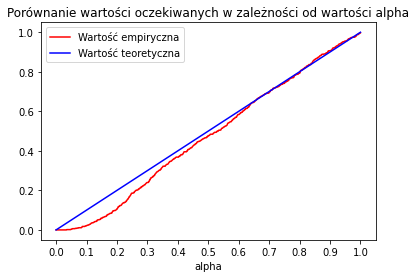

In [9]:
plt.plot(X,X1,color="r",label="Wartość empiryczna")
plt.plot(X,X,color="b",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wartości oczekiwanych w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

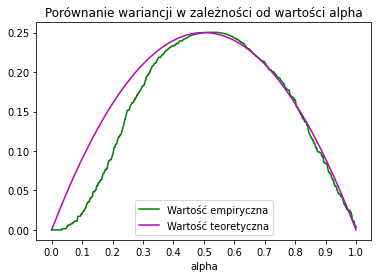

In [10]:
plt.plot(X,X2,color="g",label="Wartość empiryczna")
plt.plot(X,Y,color="m",label="Wartość teoretyczna")
plt.xticks(ticks = np.linspace(0,1,11))
plt.title("Porównanie wariancji w zależności od wartości alpha")
plt.xlabel("alpha")
plt.legend(loc="best")
plt.show()

In [9]:
#Backtesting dla cen miedzi - test równości wariancji

#Próbki danych wielkości: 20%, 40%, 50%, 60% i 80% data_rvs i ich dopełnienia
X0 = data_rvs[0:252]
X1 = data_rvs[0:504]
X2 = data_rvs[0:630]
X3 = data_rvs[0:756]
X4 = data_rvs[0:1008]

Y0 = data_rvs[252:]
Y1 = data_rvs[504:]
Y2 = data_rvs[630:]
Y3 = data_rvs[756:]
Y4 = data_rvs[1008:]

In [10]:
#Testy równości wariancji dla dwustronnej hipotezy alternatywnej
print(sp.ttest_ind(X0,Y0))
print(sp.ttest_ind(X1,Y1))
print(sp.ttest_ind(X2,Y2))
print(sp.ttest_ind(X3,Y3))
print(sp.ttest_ind(X4,Y4))

Ttest_indResult(statistic=7.611238192324326, pvalue=5.3026192486298303e-14)
Ttest_indResult(statistic=0.15605395565939004, pvalue=0.8760155292179066)
Ttest_indResult(statistic=-1.4648946487997534, pvalue=0.14319952403844802)
Ttest_indResult(statistic=1.0547511986204796, pvalue=0.29174165522200773)
Ttest_indResult(statistic=-0.08402224090260181, pvalue=0.9330521167970571)


In [13]:
print(sp.ttest_ind(X0,Y0, alternative='greater'))
print(sp.ttest_ind(X0,Y0, alternative='less'))

Ttest_indResult(statistic=7.611238192324326, pvalue=2.6513096243149152e-14)
Ttest_indResult(statistic=7.611238192324326, pvalue=0.9999999999999735)
